In [6]:
import numpy as np

### Уровень 0:
Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

Найдите собственные значения и собственные вектора матриц:  
m = np.array([[2, 2], [1, 3]])

Условия ортогональности:
    
    Сумма квадратов строк должна быть равна 1
    Сумма произведений столбцов должна быть равна 0
    
[Источник](https://ru.qaz.wiki/wiki/Orthogonal_matrix)

In [7]:
# a) Диагональная, ортогональная, но не единичная(!)

# Диагональная ортогональная матрица возможна только в том случае, когда на диагонали все элементы по модулю равны 1
# Чтобы соответсвовала услоивию, НЕ единичная, используем -1
D = np.array([
    [-1,0,0],
    [0,-1,0],
    [0,0,-1]
])

C = np.dot(D, D.transpose())
print(C)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [8]:
# b) Верхнетреугольная, ортогональная


D = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,1]
])

C = np.dot(D, D.transpose())
print(C)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [9]:
# c) Нижнетреугольная, ортогональная

D = np.array([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]
])

C = np.dot(D, D.transpose())
print(C)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [10]:
# d) Матрица, у которой определитель = 1, и все элементы не равны 0

m = np.array([[5, 3],
              [3, 2]])

print(np.linalg.det(m))
print(round(np.linalg.det(m)))

0.9999999999999987
1


In [11]:
import matplotlib.pyplot as plt

Собственные значения: [2.28077641 0.21922359]
Собственные вектора:
[[ 0.78820544 -0.61541221]
 [ 0.61541221  0.78820544]]


(-300.0, 300.0)

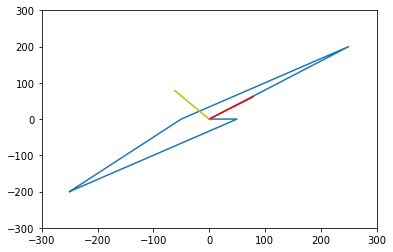

In [22]:
# Найдите собственные значения и собственные вектора матрицы

m = np.array([[1.5, 1],
              [1, 1]
              ])

w, v = np.linalg.eig(m)

print(f'Собственные значения: {w}')
print(f'Собственные вектора:')
print(v)

# Посмотрим как наша матрица отражает объект, для этого воспользуемся объектом из прошлого урока

A = [
[-100, -100],
[-100, 100],
[100, 100],
[0, 0],
[100, -100],
[-100, -100]
]

A = np.array(A)

# Умножим объект на отображение и визуализируем результат
C = np.dot(A,m)
x = C[:,0]
y = C[:,1]
plt.plot(x,y)


# Первый вектор
x = [0, v[0,0]*100]
y = [0, v[1,0]*100]
plt.plot(x,y, c='r')

# Второй вектор
x = [0, v[0,1]*100]
y = [0, v[1,1]*100]
plt.plot(x,y, c='y')

plt.xlim(-300,300)
plt.ylim(-300,300)

**Интерпретация значений:** По красному вектору(вектор 1) фигура растягивается, по желтому сжимается.
Причем растягивается фигура в 2.28 раз а сжимается в 0.22

### Уровень 1:
Найдите спектральное разложение матрицы:

m = np.array([[1, 2],[2,3]])


Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации. Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA.



**Задание 1.** Спектральное разложение матрицы

In [28]:
m = np.array([[1, 2],[2,3]])
print(m)

[[1 2]
 [2 3]]


In [29]:
# Получим собственные вектора и собственные значения матрицы
w, v = np.linalg.eigh(m)

# Получим матрицу D, диагональную матрицу, на главной диагонали которой, находяся собственные значения
D = np.diag(w)

# Получим матрицу S, которая является матрицей собственных векторов
S = v

# Запишем спектральное разложение
A = S.T @ D @ S

# Проверим результат
print(A)

[[1. 2.]
 [2. 3.]]


**Задание 2.** Зависимость количества компонентов и точность восстановления картинки

In [15]:
# Загружаем датасет с картинками и смотрим число компонентов
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [16]:
from sklearn.decomposition import PCA

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
# Отбираем только картинки и преобразуем изображения в двухмерную форму

img = digits.images
shape = img.shape
train = img.reshape((shape[0], shape[1] * shape[2]))

In [19]:
# Просчитываем качество восстановления в зависимости от числа компонентов
x = []
y = []
for i in range(0,65):
    x += [i]
    pca = PCA(n_components=i)
    trans = pca.fit_transform(train)
    res = pca.inverse_transform(trans)
    y += [mean_squared_error(train, res)]

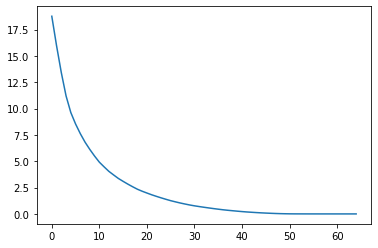

In [20]:
# Визуализируем результат
plt.plot(x,y)

**Вывод:** Зависимоть выражена экспонентой. При понижении числа компонентов до 50 изменений почти нет. При понижении до 30 изменения не значительны. При достижении 15 и ниже точность восстановления начинает очень быстро падать.